In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np 
import matplotlib.pyplot as plt

C:\Users\ntk00\AppData\Local\Temp\ipykernel_16148\2583356143.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


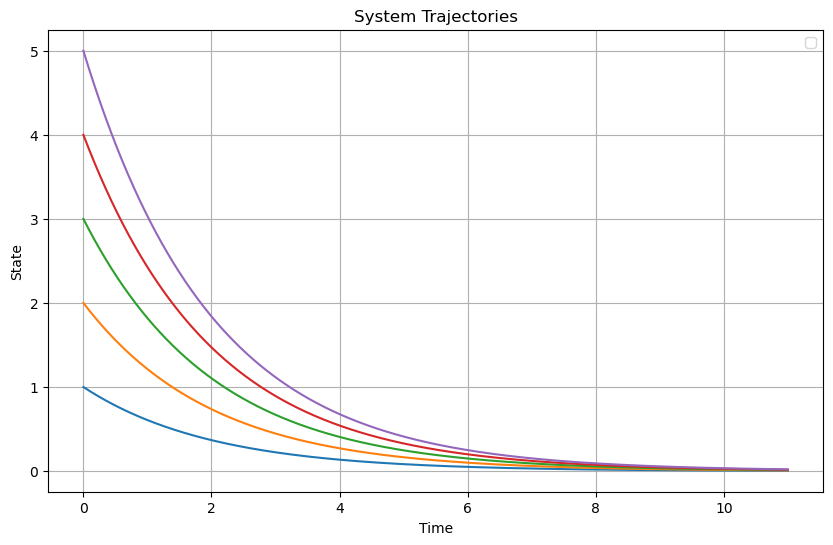

In [2]:
# Data
t_vals = np.arange(0, 11, 0.001) 
x0_vals = [1, 2, 3, 4, 5]

# Initialize matrix to store trajectories
Y = np.zeros((len(t_vals), len(x0_vals)))  # (11, 5)
X = t_vals.reshape(-1, 1)  # (11, 1)

# Generate trajectories
for i, x0 in enumerate(x0_vals):
    for j, t in enumerate(t_vals):
        Y[j, i] = x0 * np.exp(-0.5 * t)  # Direct calculation for each time point

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(t_vals, Y[:, i])
plt.xlabel('Time')
plt.ylabel('State')
plt.title('System Trajectories')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
inputs = Input(shape=(1,))
x_dense = Dense(64, activation='sigmoid')(inputs)
x_dense = Dense(64, activation='sigmoid')(x_dense)
outputs = Dense(5)(x_dense)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, validation_split=0.2)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5169 - val_loss: 0.0679
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.0517 - val_loss: 0.0150
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0104 - val_loss: 0.0036
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3241e-04 - val_loss: 7.8330e-04
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1458e-04 - val_loss: 6.0403e-04
Epoch 9/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6434e-04 - val_loss: 5.0495e-04
Epoch 10/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3236e-04 - val_loss: 4.6592e-04
Epoch 11/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6026e-04 - val_loss: 3.2898e-04

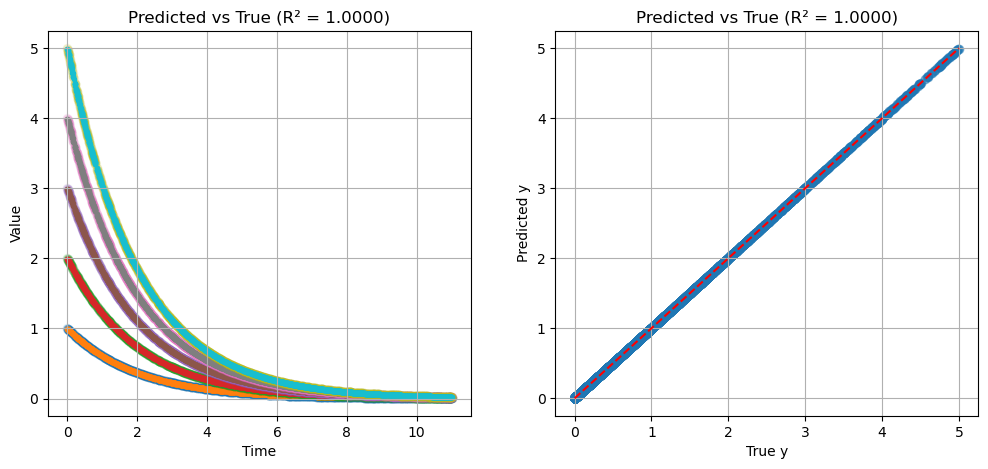

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(5):
    plt.scatter(X_test, y_test[:, i], alpha= 0.1)
    plt.scatter(X_test, y_pred[:, i], marker='.')
plt.title(f"Predicted vs True (R² = {r2:.4f})")
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred.flatten(), alpha=0.5)  # flatten the predictions
plt.plot([0, 5], [0, 5], 'r--')
plt.title(f"Predicted vs True (R² = {r2:.4f})")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.grid(True)

In [5]:
N = 1000
x = np.random.uniform(-5, 5, size=(N, 1))
u = np.random.uniform(-10, 10, size=(N, 1))

x_next = x + 0.5 * u

X = np.hstack([x, u]) 
y = x_next

np.shape(X), np.shape(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
inputs = Input(shape=(2,))
x_dense = Dense(2, activation='linear')(inputs)
outputs = Dense(1)(x_dense)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=100, validation_split=0.2)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 73.9290 - val_loss: 64.1214
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.3217 - val_loss: 59.5481
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.7933 - val_loss: 55.3801
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.5829 - val_loss: 51.6500
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.5457 - val_loss: 48.2139
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.0241 - val_loss: 45.1071
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.5389 - val_loss: 42.3366
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.0719 - val_loss: 39.8178
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.3568 - val_loss: 37.4860
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.6845 - val_loss: 35.3912
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.0261 - val_loss: 33.4412
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0

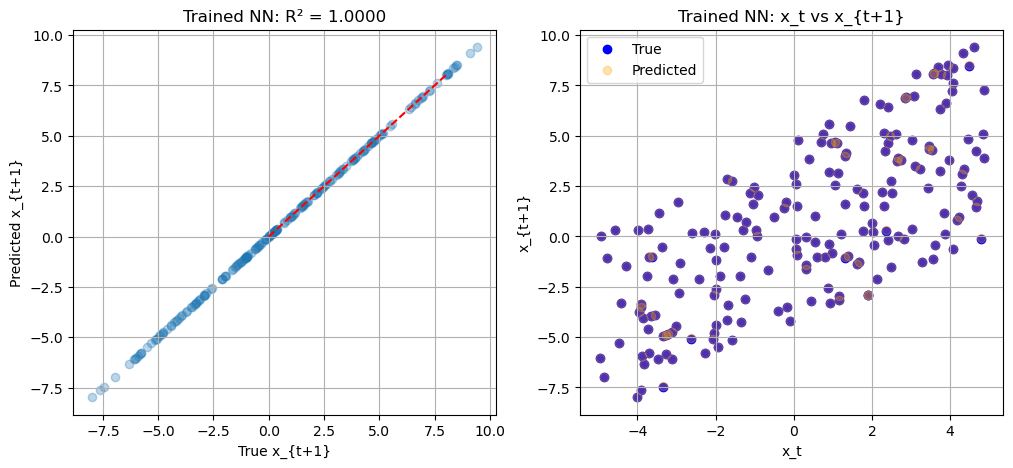

In [7]:
# Plot results
plt.figure(figsize=(12, 5))

# Trained NN results
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0,8], [0,8], 'r--')
plt.xlabel('True x_{t+1}')
plt.ylabel('Predicted x_{t+1}')
plt.title(f'Trained NN: R² = {r2:.4f}')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(x_test[:, 0], y_test, label='True', color= 'blue')
plt.scatter(x_test[:, 0], y_pred, alpha=0.3, label='Predicted', color='orange')
plt.xlabel('x_t')
plt.ylabel('x_{t+1}')
plt.title('Trained NN: x_t vs x_{t+1}')
plt.grid()
plt.legend()

In [8]:
inputs = Input(shape=(2,))
x_dense = Dense(1, use_bias=True)(inputs)  
manual_model = Model(inputs=inputs, outputs=x_dense)

weights = np.array([[1.0],    # State 
                    [0.5]])   # Control 
bias = np.array([0.0])       
manual_model.layers[1].set_weights([weights, bias])

y_pred_manual = manual_model.predict(x_test)
r2_manual = r2_score(y_test, y_pred_manual)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


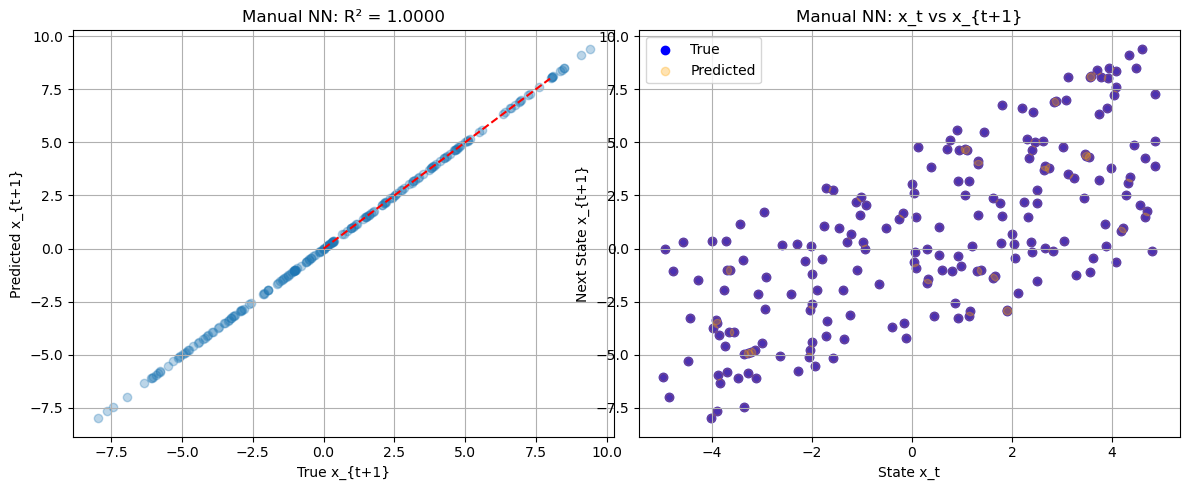

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, alpha=0.3)
plt.plot([0,8], [0,8], 'r--')
plt.xlabel('True x_{t+1}')
plt.ylabel('Predicted x_{t+1}')
plt.title(f'Manual NN: R² = {r2_manual:.4f}')
plt.grid()
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.scatter(x_test[:, 0], y_test, label='True', color='blue')
plt.scatter(x_test[:, 0], y_pred_manual, alpha=0.3, label='Predicted', color='orange')
plt.title('Manual NN: x_t vs x_{t+1}')
plt.xlabel('State x_t')
plt.ylabel('Next State x_{t+1}')
plt.legend()
plt.grid()